## HDDM Analysis of raw reaction times


Models for Drit-Rate (v) and Bias (z) dependent on main effects (Stim and Level) and Conditions
--> 6 Models are estimated

-----
         Main effects:                                Conditions:
----
       Stim:
        - happy                                     - happy 8ms
        - sad                                       - happy 16ms
        - neutral                                   - happy 25ms
                                                    - happy 141ms
        Level:                                      - sad 8ms
        - 141ms                                     - sad 16ms
        - 25ms                                      - sad 25ms
        - 16ms                                      - sad 141ms
        - 8ms                                       - neutral 8ms
                                                    - neutral 16ms
                                                    - neutral 25ms
                                                    - neutral 141ms
                                                    
                                                    

In [1]:
#Load in packages
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import hddm
print (hddm.__version__)

0.6.0


C:\Users\juhoffmann\Anaconda3\envs\hddm_analysis\lib\site-packages\IPython\parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


In [2]:
#Load in dataset
data = hddm.load_csv('.../hddm_data_study2.csv')
data = data.drop(['Unnamed: 0'], axis=1) #Drop unnecessary column
data = data.dropna(subset=['rt'])        #Delete NAN
data.head(10)                            #View first 10 rows of dataset

# rename columns
data.rename(columns = {'response':'key_pressed'}, inplace = True) 
data.rename(columns = {'correct':'response'}, inplace = True) 

data['subj_idx'] = data['subj_idx'].replace(['0HZ'],'005')
data['subj_idx'] = data['subj_idx'].astype(float)
data.head(10)
#data.describe()



,subj_idx,rt,response,key_pressed,stim,level,real_trial_number,trial,block,conditions,study_number,primer_time
0,42.0,1.247361,1.0,8.0,neutral,141ms,8.0,7.0,0.0,141ms_neutral,study2,0.149150
1,42.0,1.104279,1.0,9.0,happy,25ms,10.0,9.0,0.0,25ms_happy,study2,0.024608
2,42.0,1.366507,1.0,9.0,happy,141ms,11.0,10.0,0.0,141ms_happy,study2,0.149679
3,42.0,1.189963,1.0,7.0,sad,141ms,13.0,12.0,0.0,141ms_sad,study2,0.149711
4,42.0,1.407712,1.0,9.0,happy,25ms,15.0,14.0,0.0,25ms_happy,study2,0.024650
5,42.0,1.015348,1.0,8.0,neutral,25ms,17.0,16.0,0.0,25ms_neutral,study2,0.024483
6,42.0,0.885878,1.0,8.0,neutral,141ms,18.0,17.0,0.0,141ms_neutral,study2,0.149314
7,42.0,1.096443,1.0,9.0,happy,25ms,19.0,18.0,0.0,25ms_happy,study2,0.024781
8,42.0,1.123209,1.0,9.0,happy,141ms,20.0,19.0,0.0,141ms_happy,study2,0.149952
9,42.0,1.043310,1.0,9.0,happy,16ms,23.0,22.0,0.0,16ms_happy,study2,0.016038


In [3]:
#delete unnecessary columns
del data['key_pressed']
del data['real_trial_number']
del data['trial']
del data['block']
del data['study_number']
del data['primer_time']
data.head(10)


,subj_idx,rt,response,stim,level,conditions
0,42.0,1.247361,1.0,neutral,141ms,141ms_neutral
1,42.0,1.104279,1.0,happy,25ms,25ms_happy
2,42.0,1.366507,1.0,happy,141ms,141ms_happy
3,42.0,1.189963,1.0,sad,141ms,141ms_sad
4,42.0,1.407712,1.0,happy,25ms,25ms_happy
5,42.0,1.015348,1.0,neutral,25ms,25ms_neutral
6,42.0,0.885878,1.0,neutral,141ms,141ms_neutral
7,42.0,1.096443,1.0,happy,25ms,25ms_happy
8,42.0,1.123209,1.0,happy,141ms,141ms_happy
9,42.0,1.043310,1.0,happy,16ms,16ms_happy


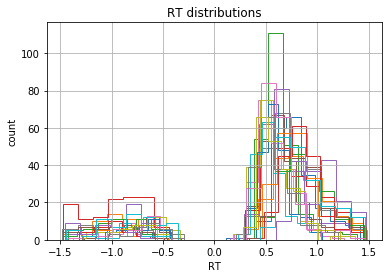

In [4]:
#Draw reaction time distributions
data = hddm.utils.flip_errors(data)
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
for i, subj_data in data.groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)
#plt.savefig('hddm_rt_distribution.pdf')

In [5]:
data.head(10)
data.describe()

,subj_idx,rt,response
count,4953.000000,4953.000000,4953.000000
mean,36.513224,0.459036,0.835655
std,6.857295,0.643261,0.370626
min,25.000000,-1.479264,0.000000
25%,30.000000,0.460280,1.000000
50%,37.000000,0.623542,1.000000
75%,42.000000,0.813785,1.000000
max,48.000000,1.479828,1.000000


# Model for drift-rate depending on conditions
### Gelman Rubin R Statistic for convergence check


In [6]:
models = list()
for i in range(5): #Estimate Model 5 times
    m = hddm.HDDM(data, p_outlier=0.05,depends_on={'v': 'conditions'})  #Drift-rate v dependent on 12 conditions
    m.find_starting_values() 
    m.sample(2000, burn=20,dbname='v_conditions.db',db='pickle')  #Draw 2.000 samples, burn first20
    models.append(m)
hddm.analyze.gelman_rubin(models) #Check for convergence within and between chains

C:\Users\juhoffmann\Anaconda3\envs\hddm_analysis\lib\site-packages\scipy\optimize\optimize.py:1934: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 [-----------------100%-----------------] 2000 of 2000 complete in 179.3 sec

{'a': 0.9999675658708791,
 'a_std': 1.0024948492734913,
 'a_subj.25.0': 1.0005568589242386,
 'a_subj.27.0': 1.000258852983956,
 'a_subj.28.0': 1.0003606571870223,
 'a_subj.29.0': 1.0002133657973682,
 'a_subj.30.0': 1.0018107507939387,
 'a_subj.32.0': 0.999970283214305,
 'a_subj.33.0': 1.0006354129508426,
 'a_subj.34.0': 1.0009095380417203,
 'a_subj.36.0': 0.9999071380897703,
 'a_subj.37.0': 1.0004079898397933,
 'a_subj.38.0': 1.0021864637449762,
 'a_subj.39.0': 1.0022888802363379,
 'a_subj.40.0': 1.0021156526823047,
 'a_subj.41.0': 1.0034464963154042,
 'a_subj.42.0': 1.0000781616141263,
 'a_subj.43.0': 1.0073923432475667,
 'a_subj.45.0': 1.0007036874203155,
 'a_subj.46.0': 1.002643420098022,
 'a_subj.47.0': 1.0000919667025214,
 'a_subj.48.0': 1.0001533795261408,
 't': 1.0005104728834464,
 't_std': 1.000594621622816,
 't_subj.25.0': 1.0012412558118022,
 't_subj.27.0': 1.0005533496436458,
 't_subj.28.0': 1.0004383558755698,
 't_subj.29.0': 1.0006237420122948,
 't_subj.30.0': 1.0017738819

In [7]:
#m.save('v_conditions')

Plotting a
Plotting a_std
Plotting v(141ms_happy)
Plotting v(141ms_neutral)
Plotting v(141ms_sad)
Plotting v(16ms_happy)
Plotting v(16ms_neutral)
Plotting v(16ms_sad)
Plotting v(25ms_happy)
Plotting v(25ms_neutral)
Plotting v(25ms_sad)
Plotting v(8ms_happy)
Plotting v(8ms_neutral)
Plotting v(8ms_sad)
Plotting v_std
Plotting t
Plotting t_std


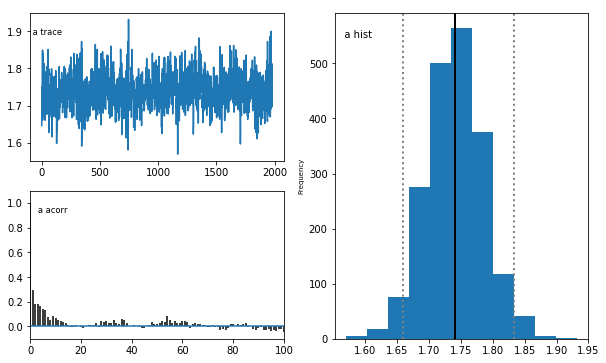

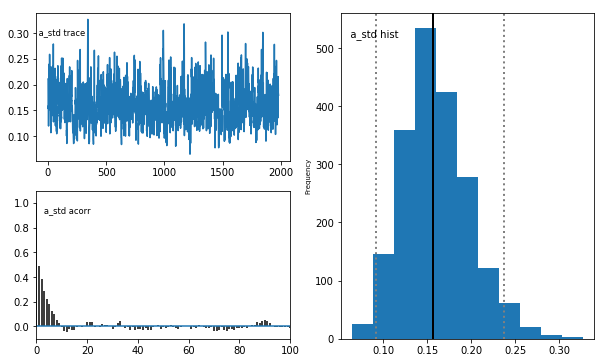

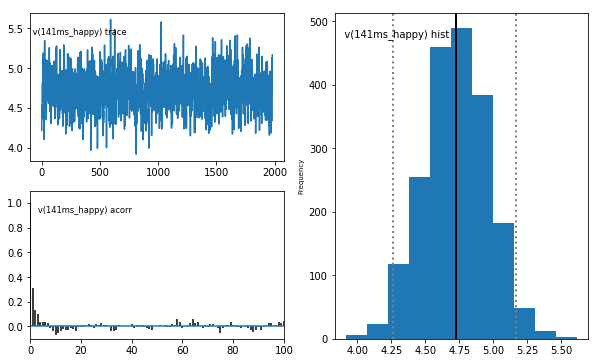

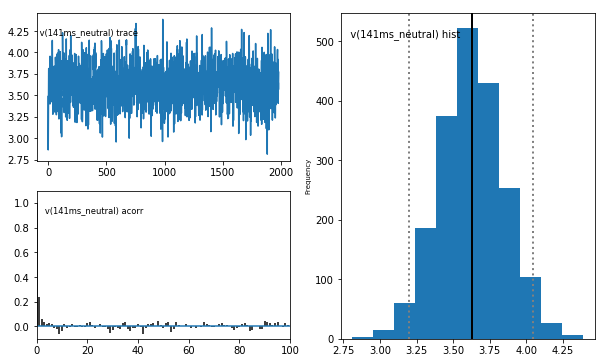

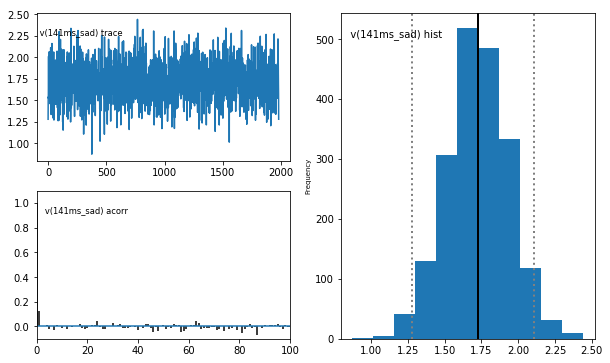

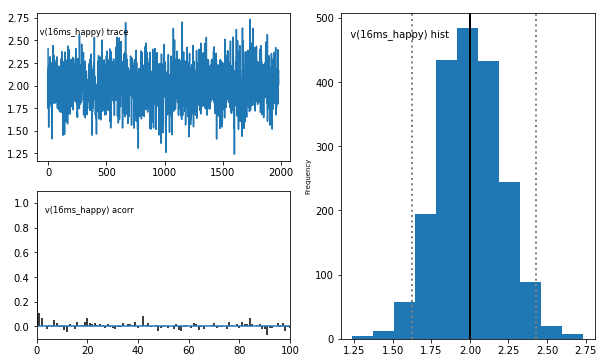

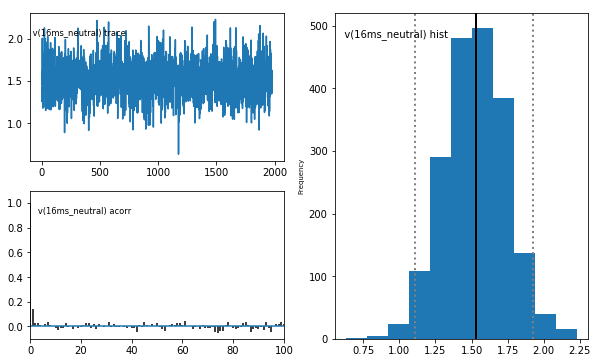

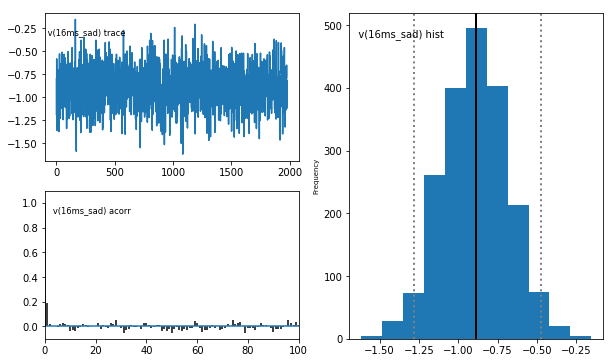

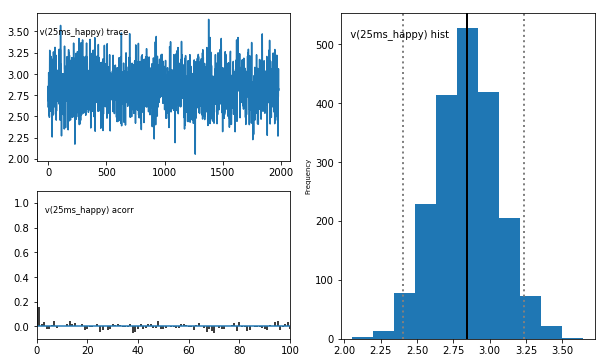

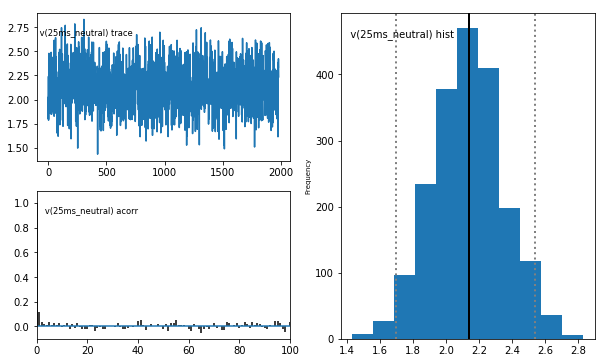

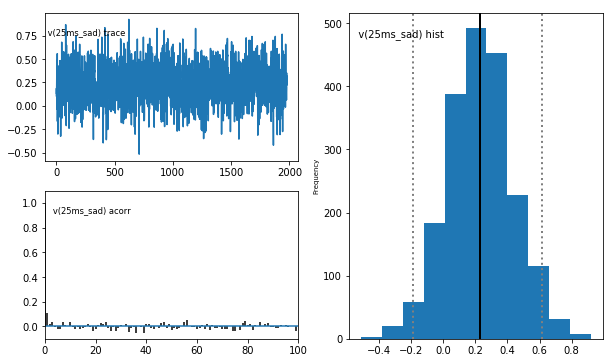

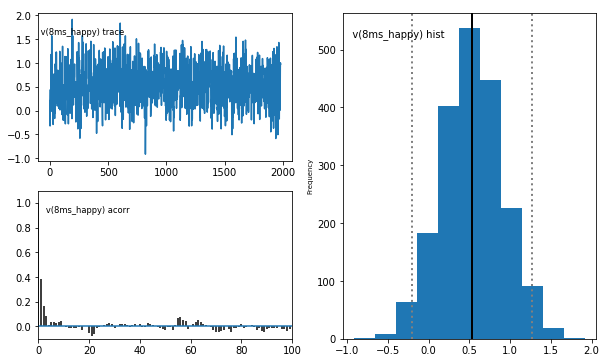

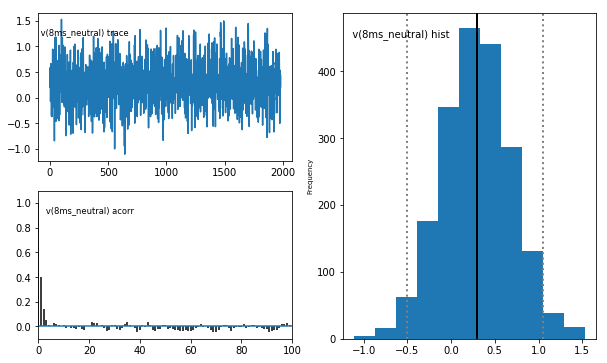

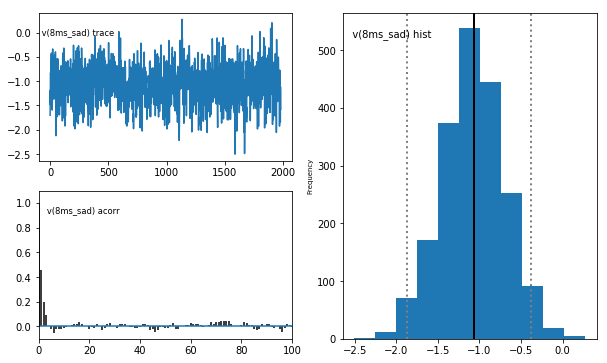

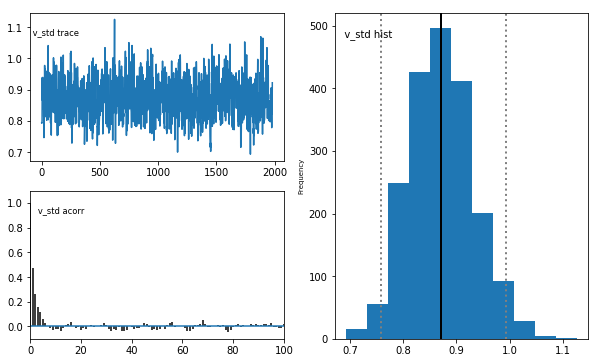

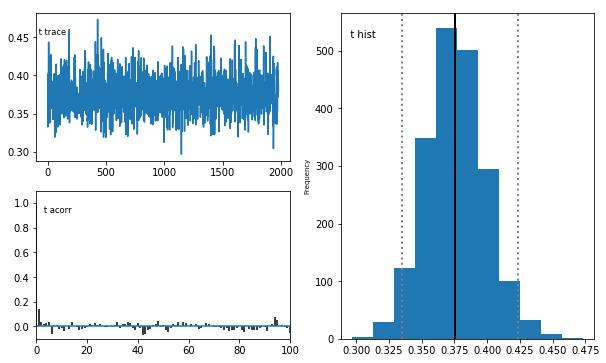

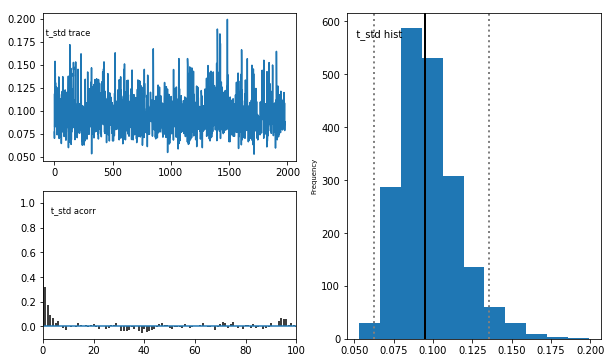

In [8]:
m.plot_posteriors()

In [9]:
m.print_stats()

                                mean       std      2.5q       25q       50q       75q     97.5q    mc err
a                           1.740486  0.044862  1.656528  1.710528  1.740323  1.770575  1.832638  0.001875
a_std                       0.160701  0.037837  0.097230  0.134854  0.156834  0.183524  0.247876  0.001667
a_subj.25.0                 1.857809  0.100980  1.662320  1.788188  1.854326  1.927850  2.059528  0.004743
a_subj.27.0                 1.665242  0.069021  1.540113  1.615267  1.661652  1.710080  1.811327  0.002657
a_subj.28.0                 1.525588  0.074359  1.388374  1.475964  1.522224  1.571398  1.687424  0.004185
a_subj.29.0                 1.686315  0.051784  1.585508  1.650595  1.685179  1.721096  1.790334  0.001699
a_subj.30.0                 1.848755  0.081941  1.696134  1.792612  1.846107  1.904006  2.015021  0.003504
a_subj.32.0                 1.688114  0.073104  1.550208  1.641457  1.685716  1.736417  1.831975  0.003213
a_subj.33.0                 1.637510 

# Plot Drift-Rates for all conditions

In [10]:
import matplotlib.pyplot

(0, 4)

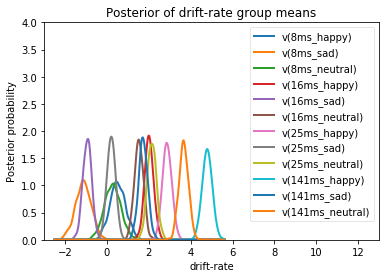

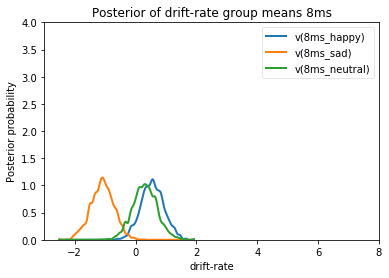

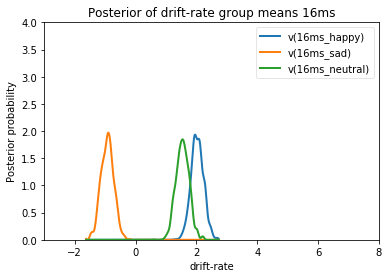

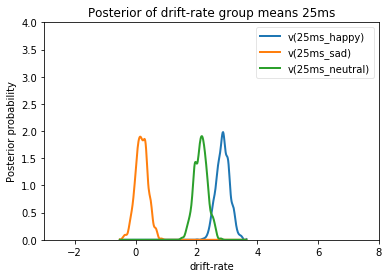

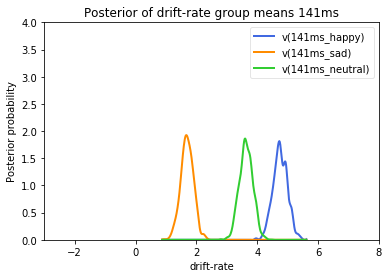

In [11]:
v_8ms_happy, v_8ms_sad, v_8ms_neutral,v_16ms_happy, v_16ms_sad, v_16ms_neutral, v_25ms_happy, v_25ms_sad, v_25ms_neutral, v_141ms_happy, v_141ms_sad, v_141ms_neutral  = m.nodes_db.node[['v(8ms_happy)', 'v(8ms_sad)', 'v(8ms_neutral)','v(16ms_happy)', 'v(16ms_sad)', 'v(16ms_neutral)', 'v(25ms_happy)', 'v(25ms_sad)', 'v(25ms_neutral)', 'v(141ms_happy)', 'v(141ms_sad)', 'v(141ms_neutral)']] 
hddm.analyze.plot_posterior_nodes([v_8ms_happy, v_8ms_sad, v_8ms_neutral,v_16ms_happy, v_16ms_sad, v_16ms_neutral, v_25ms_happy, v_25ms_sad, v_25ms_neutral, v_141ms_happy, v_141ms_sad, v_141ms_neutral])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate group means')
plt.xlim(-3,13)
plt.ylim(0,4)

v_8ms_happy, v_8ms_sad, v_8ms_neutral= m.nodes_db.node[['v(8ms_happy)', 'v(8ms_sad)', 'v(8ms_neutral)']] 
hddm.analyze.plot_posterior_nodes([v_8ms_happy, v_8ms_sad, v_8ms_neutral])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate group means 8ms')
plt.xlim(-3,8)
plt.ylim(0,4)

v_16ms_happy, v_16ms_sad, v_16ms_neutral= m.nodes_db.node[['v(16ms_happy)', 'v(16ms_sad)', 'v(16ms_neutral)']] 
hddm.analyze.plot_posterior_nodes([v_16ms_happy, v_16ms_sad, v_16ms_neutral])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate group means 16ms')
plt.xlim(-3,8)
plt.ylim(0,4)

v_25ms_happy, v_25ms_sad, v_25ms_neutral= m.nodes_db.node[['v(25ms_happy)', 'v(25ms_sad)', 'v(25ms_neutral)']] 
hddm.analyze.plot_posterior_nodes([v_25ms_happy, v_25ms_sad, v_25ms_neutral])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate group means 25ms')
plt.xlim(-3,8)
plt.ylim(0,4)

v_141ms_happy, v_141ms_sad, v_141ms_neutral= m.nodes_db.node[['v(141ms_happy)', 'v(141ms_sad)', 'v(141ms_neutral)']] 
plt.rcParams['axes.prop_cycle'] = ("cycler('color', ['royalblue','darkorange','limegreen']) +"
                                   "cycler('linestyle', ['-','-','-',])")
hddm.analyze.plot_posterior_nodes([v_141ms_happy, v_141ms_sad, v_141ms_neutral])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate group means 141ms')
plt.xlim(-3,8)
plt.ylim(0,4)


(0, 4)

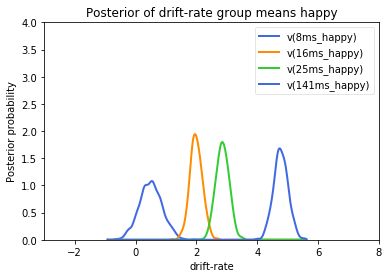

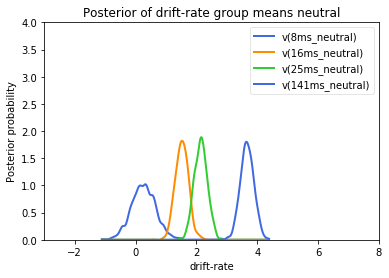

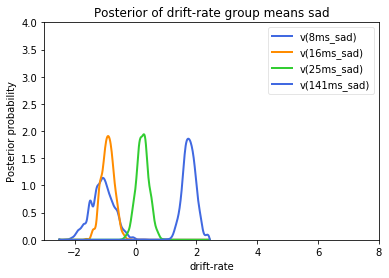

In [12]:
v_8ms_happy, v_16ms_happy, v_25ms_happy, v_141ms_happy= m.nodes_db.node[['v(8ms_happy)', 'v(16ms_happy)', 'v(25ms_happy)', 'v(141ms_happy)']] 
hddm.analyze.plot_posterior_nodes([v_8ms_happy, v_16ms_happy, v_25ms_happy, v_141ms_happy])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate group means happy')
plt.xlim(-3,8)
plt.ylim(0,4)


v_8ms_neutral, v_16ms_neutral, v_25ms_neutral, v_141ms_neutral= m.nodes_db.node[['v(8ms_neutral)', 'v(16ms_neutral)', 'v(25ms_neutral)', 'v(141ms_neutral)']] 
hddm.analyze.plot_posterior_nodes([v_8ms_neutral, v_16ms_neutral, v_25ms_neutral, v_141ms_neutral])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate group means neutral')
plt.xlim(-3,8)
plt.ylim(0,4)

v_8ms_sad, v_16ms_sad, v_25ms_sad, v_141ms_sad= m.nodes_db.node[['v(8ms_sad)', 'v(16ms_sad)', 'v(25ms_sad)', 'v(141ms_sad)']] 
hddm.analyze.plot_posterior_nodes([v_8ms_sad, v_16ms_sad, v_25ms_sad, v_141ms_sad])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate group means sad')
plt.xlim(-3,8)
plt.ylim(0,4)


# Get statistics

In [13]:
print "P(8ms_happy > 8ms_sad)=",(v_8ms_happy.trace() > v_8ms_sad.trace()).mean()
print "P(8ms_happy > 8ms_neutral)=",(v_8ms_happy.trace() > v_8ms_neutral.trace()).mean()

print "P(16ms_happy > 16ms_sad)=",(v_16ms_happy.trace() > v_16ms_sad.trace()).mean()
print "P(16ms_happy > 16ms_neutral)=",(v_16ms_happy.trace() > v_16ms_neutral.trace()).mean()

print "P(25ms_happy > 25ms_sad)=",(v_25ms_happy.trace() > v_25ms_sad.trace()).mean()
print "P(25ms_happy > 25ms_neutral)=",(v_25ms_happy.trace() > v_25ms_neutral.trace()).mean()

print "P(141ms_happy > 141ms_sad)=",(v_141ms_happy.trace() > v_141ms_sad.trace()).mean()
print "P(141ms_happy > 141ms_neutral)=",(v_141ms_happy.trace() > v_141ms_neutral.trace()).mean()


print "P(8ms_happy > 16ms_happy)=",(v_8ms_happy.trace() > v_16ms_happy.trace()).mean()
print "P(8ms_happy > 25ms_happy)=",(v_8ms_happy.trace() > v_25ms_happy.trace()).mean()
print "P(8ms_happy > 141ms_happy)=",(v_8ms_happy.trace() > v_141ms_happy.trace()).mean()
print "P(16ms_happy > 25ms_happy)=",(v_16ms_happy.trace() > v_25ms_happy.trace()).mean()
print "P(16ms_happy > 141ms_happy)=",(v_16ms_happy.trace() > v_141ms_happy.trace()).mean()
print "P(25ms_happy > 141ms_happy)=",(v_25ms_happy.trace() > v_141ms_happy.trace()).mean()


print "P(8ms_sad > 16ms_sad)=",(v_8ms_sad.trace() > v_16ms_sad.trace()).mean()
print "P(8ms_sad > 25ms_sad)=",(v_8ms_sad.trace() > v_25ms_sad.trace()).mean()
print "P(8ms_sad > 141ms_sad)=",(v_8ms_sad.trace() > v_141ms_sad.trace()).mean()
print "P(16ms_sad > 25ms_sad)=",(v_16ms_sad.trace() > v_25ms_sad.trace()).mean()
print "P(16ms_sad > 141ms_sad)=",(v_16ms_sad.trace() > v_141ms_sad.trace()).mean()
print "P(25ms_sad > 141ms_sad)=",(v_25ms_sad.trace() > v_141ms_sad.trace()).mean()


print "P(8ms_neutral > 16ms_neutral)=",(v_8ms_neutral.trace() > v_16ms_neutral.trace()).mean()
print "P(8ms_neutral > 25ms_neutral)=",(v_8ms_neutral.trace() > v_25ms_neutral.trace()).mean()
print "P(8ms_neutral > 141ms_neutral)=",(v_8ms_neutral.trace() > v_141ms_neutral.trace()).mean()
print "P(16ms_neutral > 25ms_neutral)=",(v_16ms_neutral.trace() > v_25ms_neutral.trace()).mean()
print "P(16ms_neutral > 141ms_neutral)=",(v_16ms_neutral.trace() > v_141ms_neutral.trace()).mean()
print "P(25ms_neutral > 141ms_neutral)=",(v_25ms_neutral.trace() > v_141ms_neutral.trace()).mean()

P(8ms_happy > 8ms_sad)= 0.9974747474747475
P(8ms_happy > 8ms_neutral)= 0.6762626262626262
P(16ms_happy > 16ms_sad)= 1.0
P(16ms_happy > 16ms_neutral)= 0.944949494949495
P(25ms_happy > 25ms_sad)= 1.0
P(25ms_happy > 25ms_neutral)= 0.9904040404040404
P(141ms_happy > 141ms_sad)= 1.0
P(141ms_happy > 141ms_neutral)= 1.0
P(8ms_happy > 16ms_happy)= 0.00101010101010101
P(8ms_happy > 25ms_happy)= 0.0
P(8ms_happy > 141ms_happy)= 0.0
P(16ms_happy > 25ms_happy)= 0.0030303030303030303
P(16ms_happy > 141ms_happy)= 0.0
P(25ms_happy > 141ms_happy)= 0.0
P(8ms_sad > 16ms_sad)= 0.3373737373737374
P(8ms_sad > 25ms_sad)= 0.00101010101010101
P(8ms_sad > 141ms_sad)= 0.0
P(16ms_sad > 25ms_sad)= 0.0
P(16ms_sad > 141ms_sad)= 0.0
P(25ms_sad > 141ms_sad)= 0.0
P(8ms_neutral > 16ms_neutral)= 0.005050505050505051
P(8ms_neutral > 25ms_neutral)= 0.0
P(8ms_neutral > 141ms_neutral)= 0.0
P(16ms_neutral > 25ms_neutral)= 0.024747474747474747
P(16ms_neutral > 141ms_neutral)= 0.0
P(25ms_neutral > 141ms_neutral)= 0.0


# Estimate Main Effects

# Model for drift-rate depending on main effects
### Gelman Rubin R Statistic for convergence check

In [21]:
#Gelman Rubin R statistic 
models = list()
for i in range(5):
    model_stim = hddm.HDDM(data, p_outlier=0.05,depends_on={'v': 'stim'})    #, depends_on={'v': 'stim'})
    model_stim.find_starting_values()
    model_stim.sample(2000, burn=20, dbname='v_stim.db',db='pickle')  
    models.append(model_stim)
hddm.analyze.gelman_rubin(models) #Check for convergence within and between chains



 [-----------------100%-----------------] 2000 of 2000 complete in 120.6 sec

{'a': 1.0013713242135034,
 'a_std': 1.0045921847854378,
 'a_subj.25.0': 1.0016718861452494,
 'a_subj.27.0': 1.000463864442137,
 'a_subj.28.0': 1.0002582263977056,
 'a_subj.29.0': 1.0004170564860453,
 'a_subj.30.0': 1.000477783610064,
 'a_subj.32.0': 1.0002125188065092,
 'a_subj.33.0': 1.000556163335485,
 'a_subj.34.0': 1.0012444065626787,
 'a_subj.36.0': 1.000048254814268,
 'a_subj.37.0': 1.0015935053739162,
 'a_subj.38.0': 1.0017368443756987,
 'a_subj.39.0': 1.0013478731440835,
 'a_subj.40.0': 1.0003374765489028,
 'a_subj.41.0': 1.000040362330026,
 'a_subj.42.0': 1.0002018180120253,
 'a_subj.43.0': 1.0174658422026233,
 'a_subj.45.0': 1.0004674274181486,
 'a_subj.46.0': 1.0006086568423764,
 'a_subj.47.0': 1.0010039030814761,
 'a_subj.48.0': 1.0000122334392938,
 't': 0.9998426092957676,
 't_std': 1.0000220503298818,
 't_subj.25.0': 1.0022592911323145,
 't_subj.27.0': 1.0001232160321778,
 't_subj.28.0': 1.0001667601458284,
 't_subj.29.0': 1.0001492534143697,
 't_subj.30.0': 1.00065555480

In [22]:
#model_stim.save('v_stim')

In [23]:
#Gelman Rubin R statistic 
models = list()
for i in range(5):
    model_level = hddm.HDDM(data, p_outlier=0.05,depends_on={'v': 'level'})    #, depends_on={'v': 'stim'})
    model_level.find_starting_values()
    model_level.sample(2000, burn=20, dbname='v_level.db',db='pickle') 
    models.append(model_level)
hddm.analyze.gelman_rubin(models) #Check for convergence within and between chains


 [-----------------100%-----------------] 2000 of 2000 complete in 125.9 sec

{'a': 1.0003677824072872,
 'a_std': 1.0000227584689825,
 'a_subj.25.0': 1.0006562342387906,
 'a_subj.27.0': 1.0002834851855973,
 'a_subj.28.0': 1.001678400803294,
 'a_subj.29.0': 0.9999279831900155,
 'a_subj.30.0': 1.0004181045265659,
 'a_subj.32.0': 1.0005496771774656,
 'a_subj.33.0': 1.0003218401634597,
 'a_subj.34.0': 1.0004078024315646,
 'a_subj.36.0': 1.0002539834431619,
 'a_subj.37.0': 1.00009301238237,
 'a_subj.38.0': 1.0004251502434567,
 'a_subj.39.0': 1.0018683205097751,
 'a_subj.40.0': 1.0029734703064357,
 'a_subj.41.0': 1.0006981974497313,
 'a_subj.42.0': 1.0013098783104017,
 'a_subj.43.0': 1.0144127720927445,
 'a_subj.45.0': 1.00007836015499,
 'a_subj.46.0': 1.0000348888445847,
 'a_subj.47.0': 1.0017807951821849,
 'a_subj.48.0': 1.0003979818134756,
 't': 0.9999405260006218,
 't_std': 1.0000756387442862,
 't_subj.25.0': 1.0008987770933817,
 't_subj.27.0': 1.0003711577750505,
 't_subj.28.0': 1.0039885039877479,
 't_subj.29.0': 1.0001841946293046,
 't_subj.30.0': 1.00110241722

In [24]:
#model_level.save('v_level')

Plotting a
Plotting a_std
Plotting v(happy)
Plotting v(neutral)
Plotting v(sad)
Plotting v_std
Plotting t
Plotting t_std


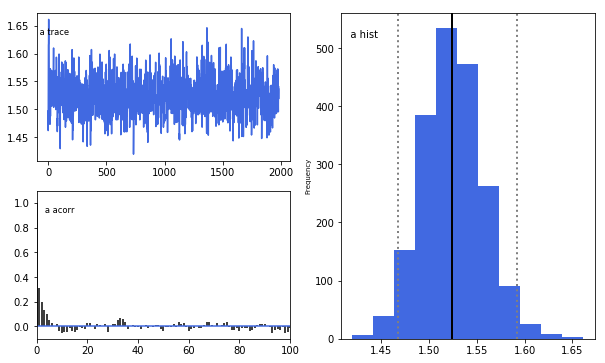

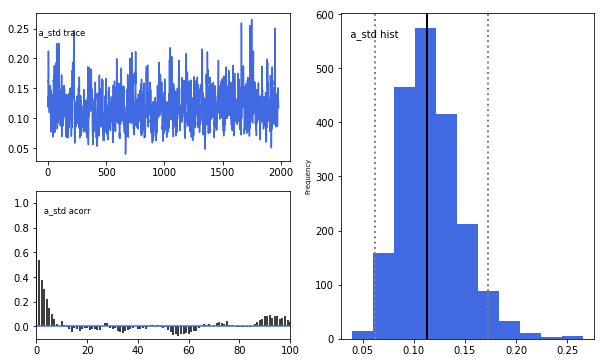

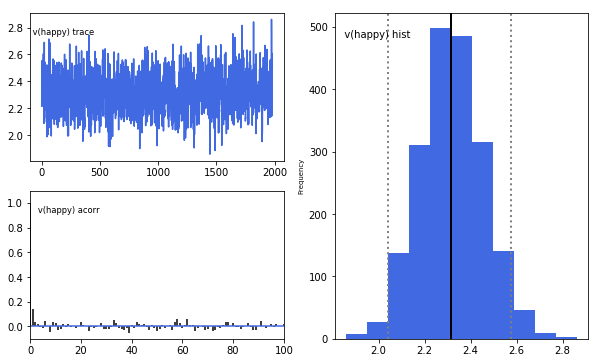

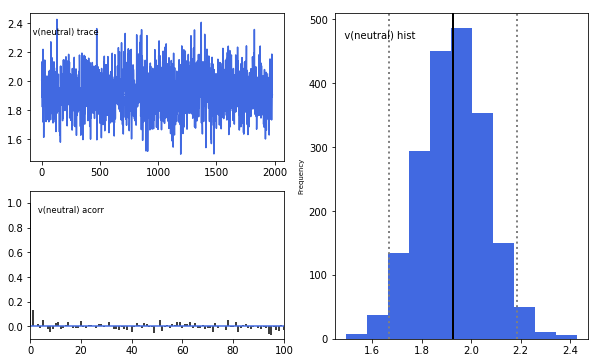

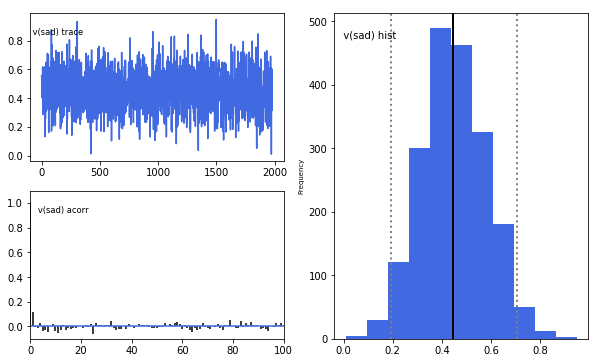

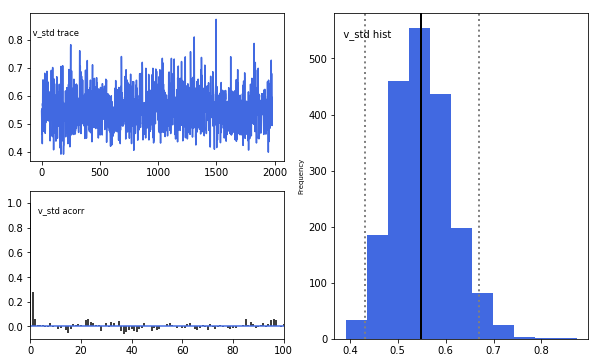

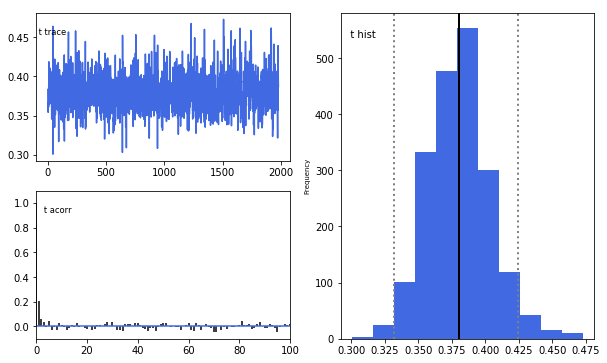

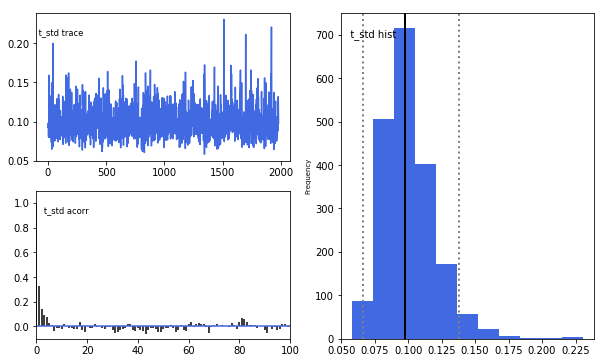

In [25]:
model_stim.plot_posteriors()

In [26]:
model_stim.print_stats()

                          mean       std      2.5q       25q       50q       75q     97.5q    mc err
a                     1.525075  0.031749  1.465033  1.503532  1.524181  1.544601  1.591033  0.001090
a_std                 0.116941  0.029473  0.068636  0.096896  0.113400  0.133631  0.184721  0.001378
a_subj.25.0           1.555669  0.066006  1.431836  1.510232  1.550818  1.600258  1.690781  0.002550
a_subj.27.0           1.582119  0.061412  1.473513  1.539235  1.576863  1.622523  1.712741  0.002530
a_subj.28.0           1.400875  0.059642  1.292487  1.359910  1.399455  1.439613  1.523675  0.002490
a_subj.29.0           1.464434  0.038777  1.390158  1.438322  1.463548  1.489621  1.542765  0.001097
a_subj.30.0           1.533952  0.051711  1.436205  1.498982  1.531363  1.568595  1.639395  0.001773
a_subj.32.0           1.506022  0.059598  1.396795  1.465390  1.505185  1.544350  1.626729  0.002352
a_subj.33.0           1.455586  0.066080  1.329328  1.408418  1.453378  1.498172  1.590614 

Plotting a
Plotting a_std
Plotting v(141ms)
Plotting v(16ms)
Plotting v(25ms)
Plotting v(8ms)
Plotting v_std
Plotting t
Plotting t_std


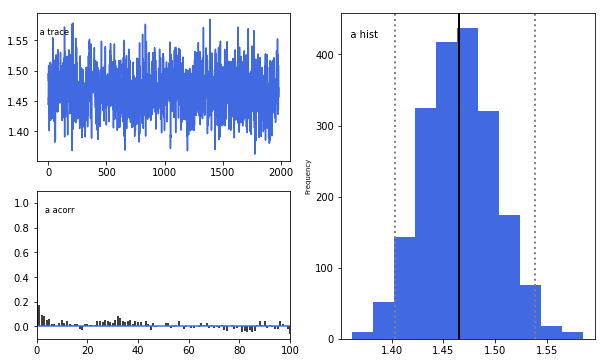

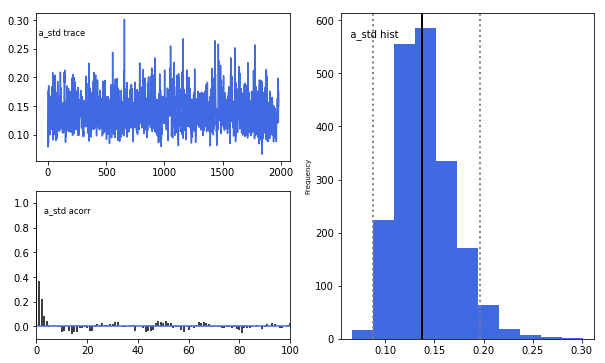

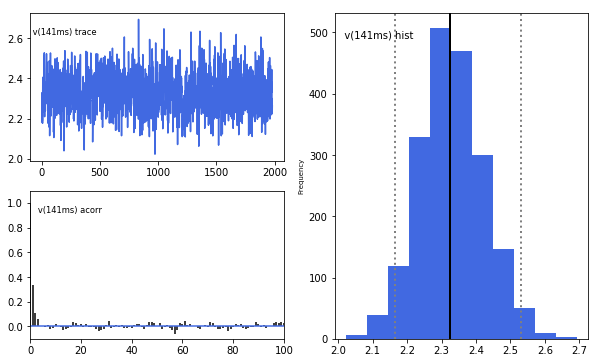

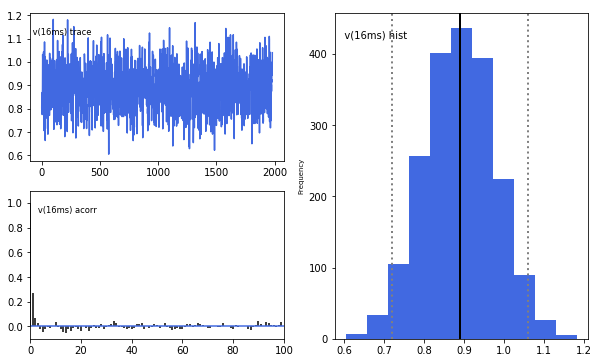

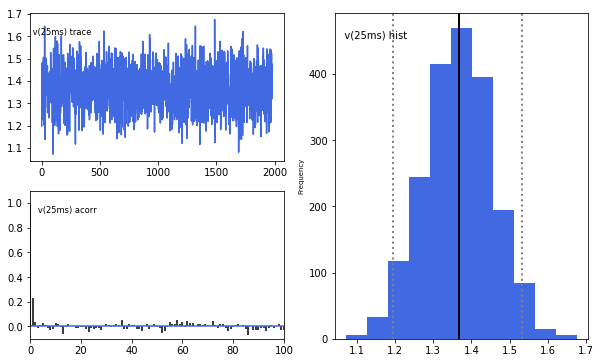

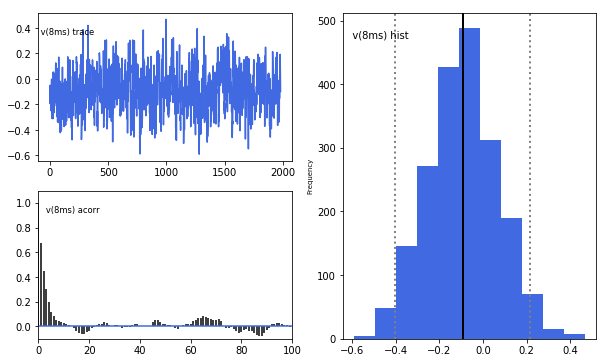

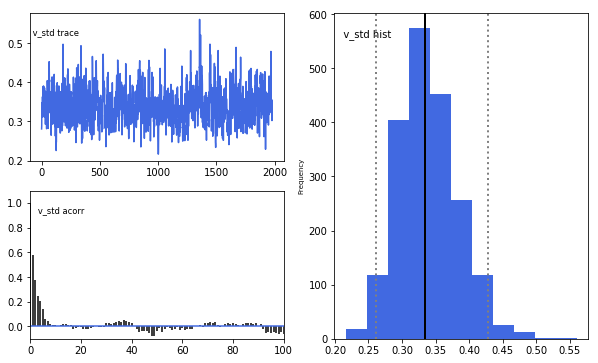

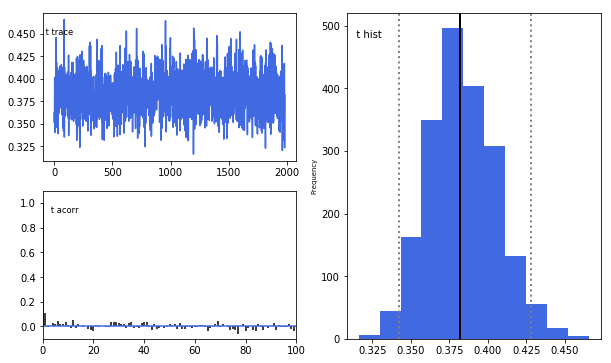

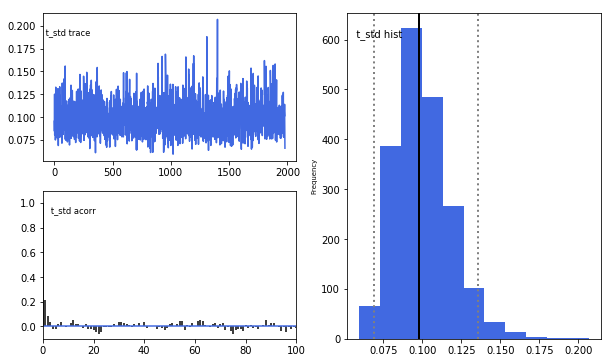

In [27]:
model_level.plot_posteriors()

In [28]:
model_level.print_stats()

                        mean       std      2.5q       25q       50q       75q     97.5q    mc err
a                   1.465914  0.034812  1.400880  1.441745  1.465423  1.489210  1.536261  0.001162
a_std               0.140521  0.029265  0.094274  0.119449  0.137207  0.157081  0.207566  0.000966
a_subj.25.0         1.492750  0.065756  1.368766  1.447921  1.491742  1.537018  1.631368  0.002360
a_subj.27.0         1.507107  0.056685  1.401641  1.465874  1.502877  1.546789  1.621255  0.002114
a_subj.28.0         1.257211  0.053072  1.167119  1.219515  1.253126  1.288088  1.374665  0.002979
a_subj.29.0         1.563321  0.044013  1.480490  1.532843  1.562681  1.592384  1.652297  0.001324
a_subj.30.0         1.571893  0.055931  1.467791  1.534071  1.571867  1.607633  1.680515  0.001907
a_subj.32.0         1.408024  0.050756  1.312251  1.371187  1.406855  1.443523  1.513388  0.001699
a_subj.33.0         1.333319  0.056284  1.230004  1.292104  1.331238  1.371399  1.445848  0.002454
a_subj.34.

# Plot drift-rate for main effects

In [29]:
import matplotlib.pyplot

(0, 6)

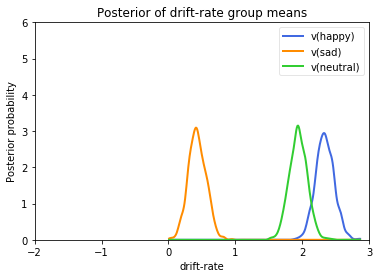

In [30]:
v_happy, v_sad, v_neutral = model_stim.nodes_db.node[['v(happy)', 'v(sad)', 'v(neutral)']] 
plt.rcParams['axes.prop_cycle'] = ("cycler('color', ['royalblue','darkorange','limegreen']) +"
                                   "cycler('linestyle', ['-','-','-',])")
hddm.analyze.plot_posterior_nodes([v_happy, v_sad, v_neutral])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate group means')
plt.xlim(-2,3)
plt.ylim(0,6)

(0, 6)

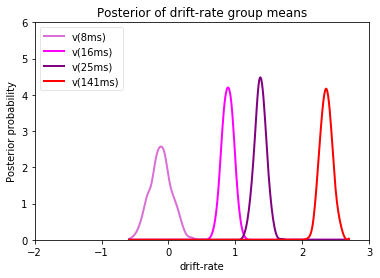

In [31]:
v_8ms, v_16ms, v_25ms, v_141ms = model_level.nodes_db.node[['v(8ms)', 'v(16ms)', 'v(25ms)', 'v(141ms)']] 
plt.rcParams['axes.prop_cycle'] = ("cycler('color', ['orchid','magenta','purple','red']) +"
                                   "cycler('linestyle', ['-','-','-','-',])")
hddm.analyze.plot_posterior_nodes([v_8ms, v_16ms, v_25ms, v_141ms])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate group means')
plt.xlim(-2,3)
plt.ylim(0,6)

# Get Statistics

In [32]:
print "P(happy > sad)=",(v_happy.trace() > v_sad.trace()).mean()
print "P(sad > happy)=",(v_sad.trace() > v_happy.trace()).mean()
print "P(happy > neutral)=",(v_happy.trace() > v_neutral.trace()).mean()
print "P(sad > neutral)=",(v_sad.trace() > v_neutral.trace()).mean()

P(happy > sad)= 1.0
P(sad > happy)= 0.0
P(happy > neutral)= 0.9828282828282828
P(sad > neutral)= 0.0


In [33]:
print "P(8ms > 16ms) =",(v_8ms.trace() > v_16ms.trace()).mean()
print "P(8ms > 25ms) =",(v_8ms.trace() > v_25ms.trace()).mean()
print "P(16ms > 25ms) =",(v_16ms.trace() > v_25ms.trace()).mean()
print "P(25ms > 141ms) =",(v_25ms.trace() > v_141ms.trace()).mean()
print "P(16ms > 141ms) =",(v_16ms.trace() > v_141ms.trace()).mean()
print "P(8ms > 141ms) =",(v_8ms.trace() > v_141ms.trace()).mean()

P(8ms > 16ms) = 0.0
P(8ms > 25ms) = 0.0
P(16ms > 25ms) = 0.000505050505050505
P(25ms > 141ms) = 0.0
P(16ms > 141ms) = 0.0
P(8ms > 141ms) = 0.0


# Model for bias depending on main effects
### Gelman Rubin R Statistic for convergence check

In [34]:
models = list()
for i in range(5):
    model_level_bias = hddm.HDDM(data, bias = True, p_outlier=0.05, depends_on={'z': 'level'})    
    model_level_bias.find_starting_values()
    model_level_bias.sample(2000, burn=20, dbname='z_level.db',db='pickle')  
    models.append(model_level_bias)
hddm.analyze.gelman_rubin(models) #Check for convergence within and between chains


 [-----------------100%-----------------] 2000 of 2000 complete in 172.2 sec

{'a': 1.0001595690974745,
 'a_std': 0.9999727774620771,
 'a_subj.25.0': 1.0000833355777965,
 'a_subj.27.0': 1.001396024693704,
 'a_subj.28.0': 1.0001438458491538,
 'a_subj.29.0': 1.0009509963120662,
 'a_subj.30.0': 1.0000128452332167,
 'a_subj.32.0': 1.0010137660942506,
 'a_subj.33.0': 1.0008498472596148,
 'a_subj.34.0': 1.0005159964666979,
 'a_subj.36.0': 1.0128984642904388,
 'a_subj.37.0': 1.000561092277934,
 'a_subj.38.0': 1.0000337699025392,
 'a_subj.39.0': 1.002352919593374,
 'a_subj.40.0': 1.0001192191314632,
 'a_subj.41.0': 1.0001727851657487,
 'a_subj.42.0': 1.00005604596747,
 'a_subj.43.0': 1.000270978959186,
 'a_subj.45.0': 1.000841704474578,
 'a_subj.46.0': 1.0002691606431482,
 'a_subj.47.0': 1.0000092652286887,
 'a_subj.48.0': 1.0001935427747446,
 't': 1.0005204975555457,
 't_std': 1.00004711202161,
 't_subj.25.0': 1.0000537354384178,
 't_subj.27.0': 1.001935198498601,
 't_subj.28.0': 1.0049405967700504,
 't_subj.29.0': 1.0010816431286211,
 't_subj.30.0': 1.0002818949302066

In [35]:
#model_level_bias.save('z_level')

In [36]:
models = list()
for i in range(5):
    model_stim_bias = hddm.HDDM(data, bias=True, p_outlier=0.05, depends_on={'z': 'stim'})   
    model_stim_bias.find_starting_values()
    model_stim_bias.sample(2000, burn=20, dbname='z_stim.db',db='pickle')  #Draw 10.000 samples, burn first 500, every 5ths sample will be saved
    models.append(model_stim_bias)
hddm.analyze.gelman_rubin(models) #Check for convergence within and between chains


 [-----------------100%-----------------] 2000 of 2000 complete in 161.9 sec

{'a': 1.0080297745814135,
 'a_std': 1.002797762175668,
 'a_subj.25.0': 1.0004124202927265,
 'a_subj.27.0': 1.0002177317968133,
 'a_subj.28.0': 1.000380341067337,
 'a_subj.29.0': 0.9999673244284291,
 'a_subj.30.0': 1.000789929732328,
 'a_subj.32.0': 1.00009082539476,
 'a_subj.33.0': 1.0002941577407374,
 'a_subj.34.0': 1.0000509781511588,
 'a_subj.36.0': 1.0001944368321283,
 'a_subj.37.0': 1.000161273529629,
 'a_subj.38.0': 1.000855158033993,
 'a_subj.39.0': 1.0023739237231877,
 'a_subj.40.0': 1.0000875851234008,
 'a_subj.41.0': 1.0023567259154802,
 'a_subj.42.0': 1.0001611740412146,
 'a_subj.43.0': 1.1982856145140621,
 'a_subj.45.0': 1.0003147698095929,
 'a_subj.46.0': 1.0002959929776798,
 'a_subj.47.0': 1.000194058652199,
 'a_subj.48.0': 1.0008835520219133,
 't': 1.0028368544212707,
 't_std': 1.0038948613563659,
 't_subj.25.0': 1.0003963121697173,
 't_subj.27.0': 1.0004369674914506,
 't_subj.28.0': 1.0011693116947125,
 't_subj.29.0': 1.0005061542713714,
 't_subj.30.0': 0.99987884343297

In [37]:
#model_stim_bias.save('z_stim')

Plotting a
Plotting a_std
Plotting v
Plotting v_std
Plotting t
Plotting t_std
Plotting z(happy)
Plotting z(neutral)
Plotting z(sad)
Plotting z_std


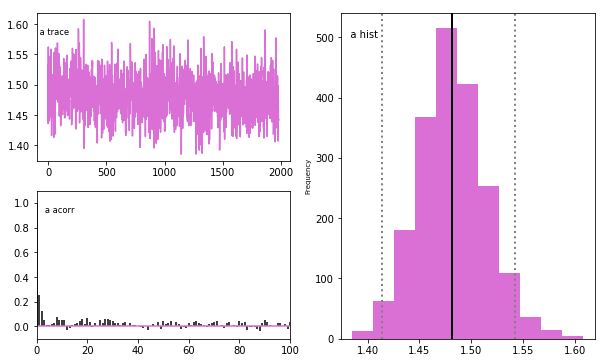

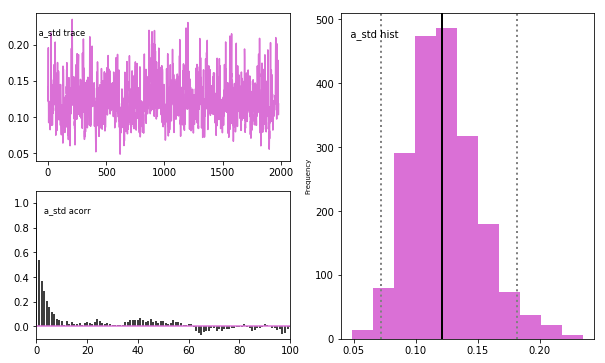

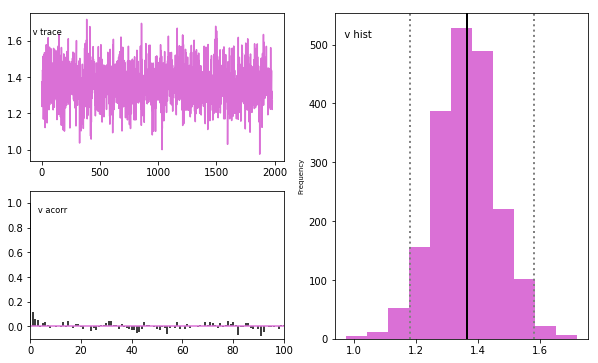

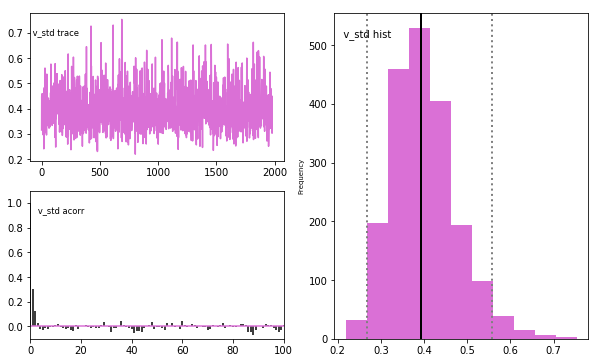

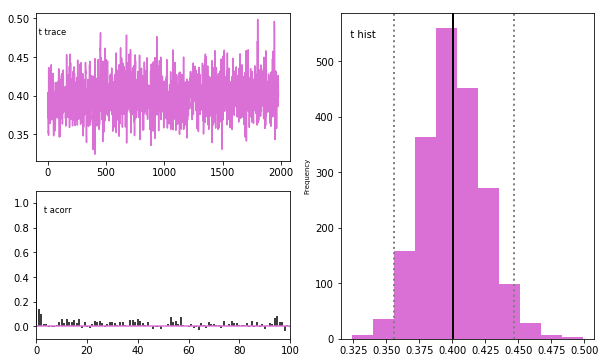

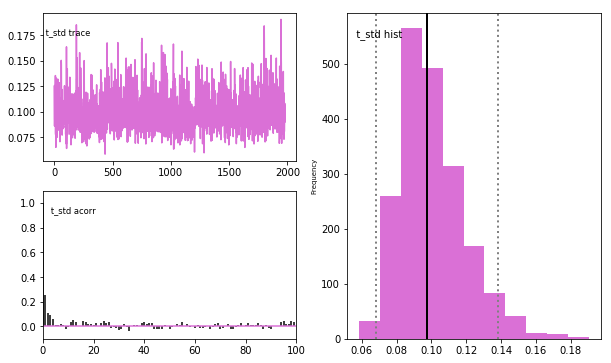

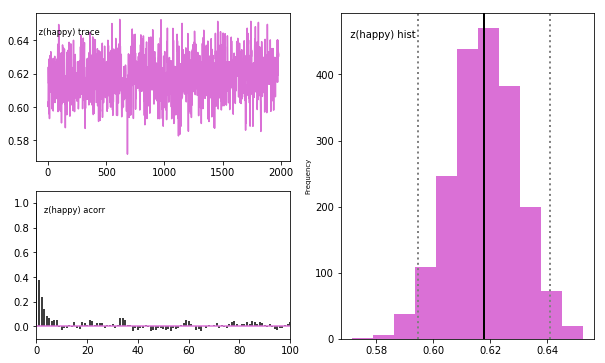

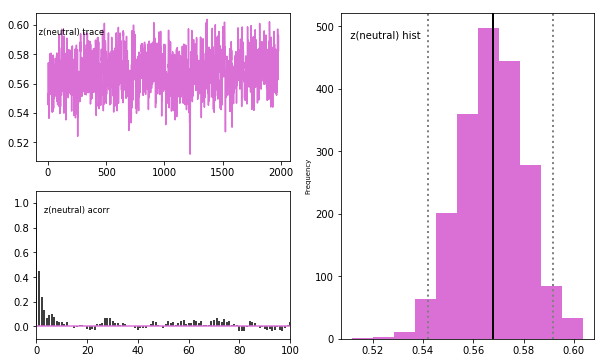

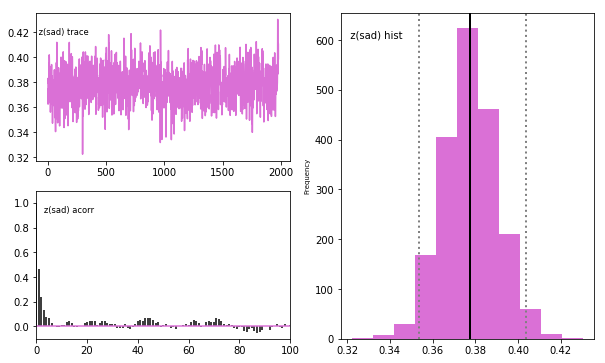

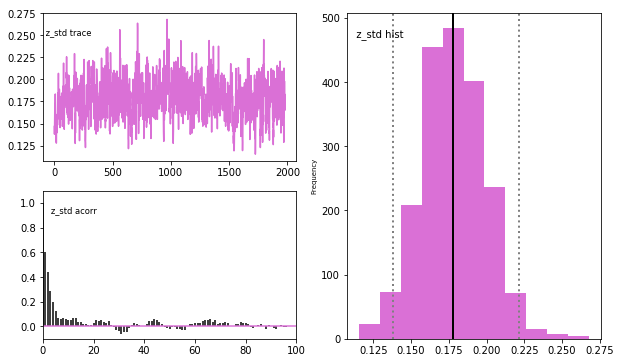

In [38]:
model_stim_bias.plot_posteriors()

In [39]:
model_stim_bias.print_stats()

                          mean       std      2.5q       25q       50q       75q     97.5q    mc err
a                     1.481811  0.032578  1.419371  1.460041  1.480829  1.502212  1.550697  0.001141
a_std                 0.123683  0.028350  0.076208  0.104143  0.121004  0.140293  0.188341  0.001290
a_subj.25.0           1.539931  0.069659  1.412027  1.489053  1.539176  1.587382  1.676358  0.002817
a_subj.27.0           1.507474  0.052374  1.409531  1.470263  1.505336  1.541552  1.618665  0.001655
a_subj.28.0           1.342648  0.053296  1.238651  1.306685  1.340824  1.377976  1.447675  0.002103
a_subj.29.0           1.469915  0.037606  1.398109  1.443239  1.469244  1.494723  1.546239  0.001090
a_subj.30.0           1.492070  0.046550  1.404125  1.461250  1.490450  1.522230  1.587813  0.001440
a_subj.32.0           1.494529  0.056682  1.385484  1.454452  1.493256  1.532479  1.610123  0.001578
a_subj.33.0           1.372849  0.059502  1.265974  1.330282  1.370238  1.412143  1.496351 

Plotting a
Plotting a_std
Plotting v
Plotting v_std
Plotting t
Plotting t_std
Plotting z(141ms)
Plotting z(16ms)
Plotting z(25ms)
Plotting z(8ms)
Plotting z_std


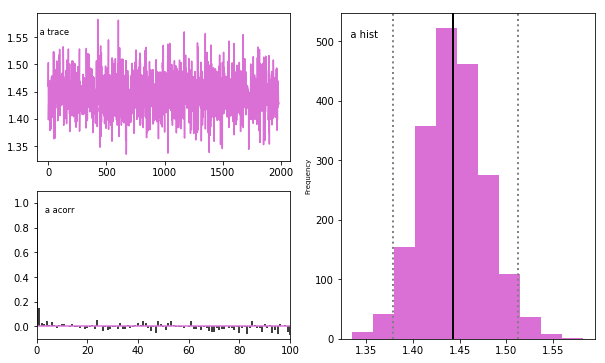

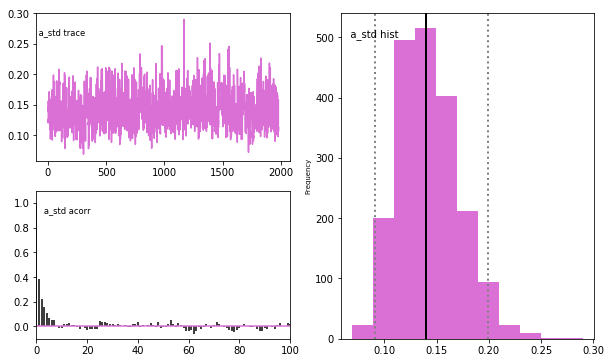

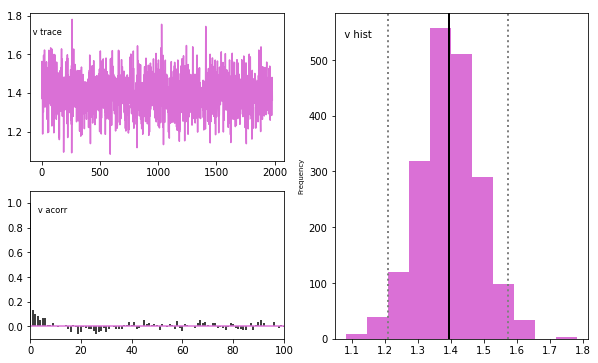

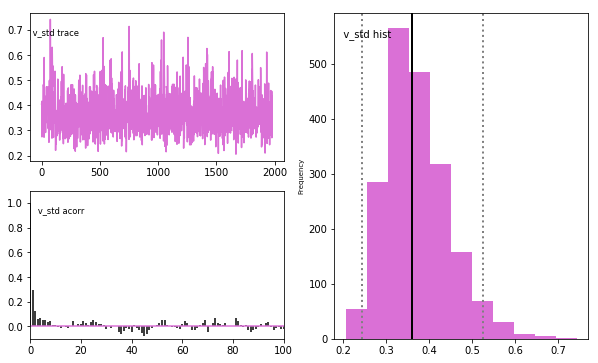

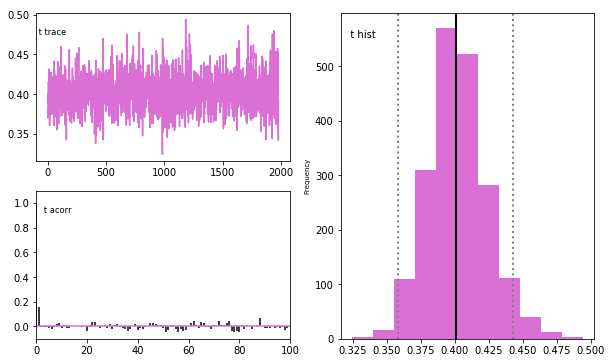

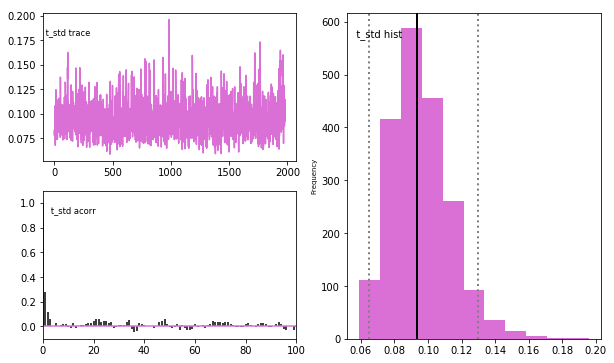

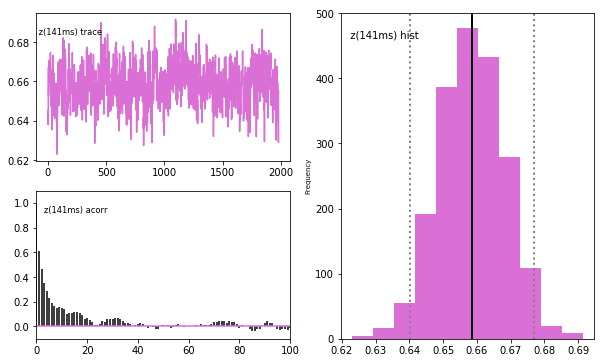

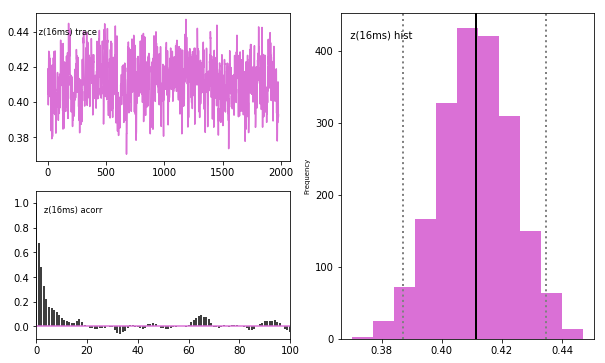

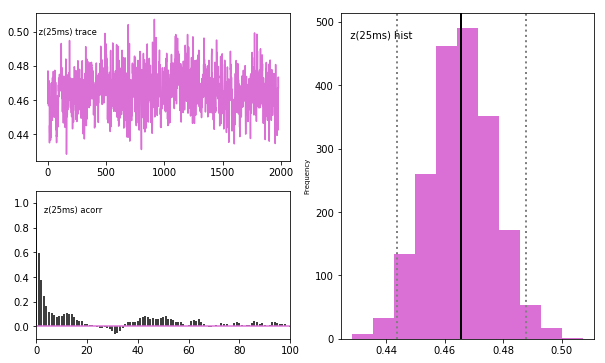

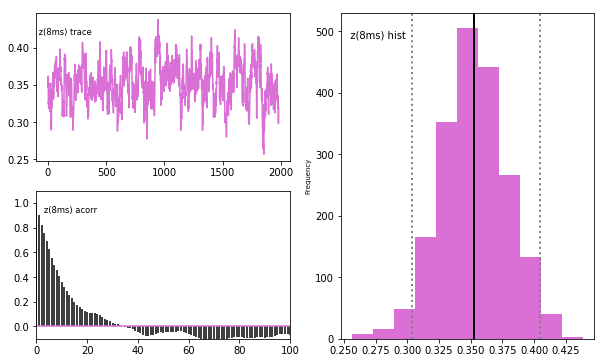

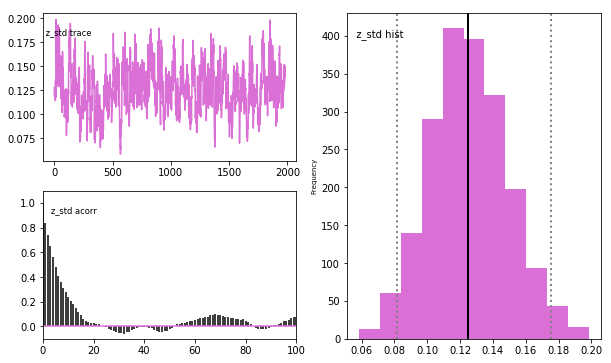

In [40]:
model_level_bias.plot_posteriors()

In [41]:
model_level_bias.print_stats()

                        mean       std      2.5q       25q       50q       75q     97.5q    mc err
a                   1.444175  0.034262  1.378886  1.421156  1.443492  1.466797  1.512561  0.000980
a_std               0.142491  0.029174  0.094312  0.120963  0.139335  0.160781  0.206333  0.001142
a_subj.25.0         1.429827  0.057299  1.324499  1.389202  1.425594  1.466844  1.551087  0.002355
a_subj.27.0         1.535519  0.074230  1.404322  1.482069  1.531340  1.585281  1.690473  0.003842
a_subj.28.0         1.236587  0.042570  1.147951  1.209251  1.237295  1.264418  1.318665  0.001277
a_subj.29.0         1.494812  0.039558  1.417524  1.467813  1.493965  1.520521  1.577170  0.001238
a_subj.30.0         1.507931  0.048023  1.416330  1.475486  1.505110  1.538819  1.604492  0.001447
a_subj.32.0         1.407377  0.048280  1.314017  1.375551  1.405239  1.439157  1.506332  0.001721
a_subj.33.0         1.293820  0.047310  1.205016  1.260522  1.291225  1.325123  1.393765  0.001774
a_subj.34.

# Plot bias for main effects

(0, 50)

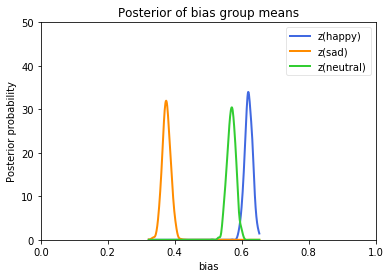

In [42]:
z_happy, z_sad, z_neutral = model_stim_bias.nodes_db.node[['z(happy)', 'z(sad)', 'z(neutral)']] 
plt.rcParams['axes.prop_cycle'] = ("cycler('color', ['royalblue','darkorange','limegreen']) +"
                                   "cycler('linestyle', ['-','-','-',])")
hddm.analyze.plot_posterior_nodes([z_happy, z_sad, z_neutral])
plt.xlabel('bias')
plt.ylabel('Posterior probability')
plt.title('Posterior of bias group means')
plt.xlim(0,1)
plt.ylim(0,50)

(0, 60)

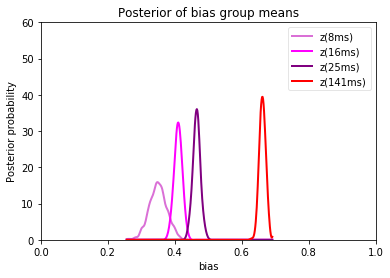

In [43]:
z_8ms, z_16ms, z_25ms, z_141ms = model_level_bias.nodes_db.node[['z(8ms)', 'z(16ms)', 'z(25ms)', 'z(141ms)']] 
plt.rcParams['axes.prop_cycle'] = ("cycler('color', ['orchid','magenta','purple','red']) +"
                                   "cycler('linestyle', ['-','-','-','-',])")

hddm.analyze.plot_posterior_nodes([z_8ms, z_16ms, z_25ms, z_141ms])
plt.xlabel('bias')
plt.ylabel('Posterior probability')
plt.title('Posterior of bias group means')
plt.xlim(0,1)
plt.ylim(0,60)

# Get Statistics

In [44]:
print "P(happy > sad)=",(z_happy.trace() > z_sad.trace()).mean()
print "P(sad > happy)=",(z_sad.trace() > z_happy.trace()).mean()
print "P(happy > neutral)=",(z_happy.trace() > z_neutral.trace()).mean()
print "P(sad > neutral)=",(z_sad.trace() > z_neutral.trace()).mean()

P(happy > sad)= 1.0
P(sad > happy)= 0.0
P(happy > neutral)= 0.998989898989899
P(sad > neutral)= 0.0


In [45]:
print "P(8ms > 16ms)=",(z_8ms.trace() > z_16ms.trace()).mean()
print "P(8ms > 25ms)=",(z_8ms.trace() > z_25ms.trace()).mean()
print "P(8ms > 141ms)=",(z_8ms.trace() > z_141ms.trace()).mean()
print "P(16ms > 25ms)=",(z_16ms.trace() > z_25ms.trace()).mean()
print "P(16ms > 141ms)=",(z_16ms.trace() > z_141ms.trace()).mean()
print "P(25ms > 141ms)=",(z_25ms.trace() > z_141ms.trace()).mean()

P(8ms > 16ms)= 0.010101010101010102
P(8ms > 25ms)= 0.0
P(8ms > 141ms)= 0.0
P(16ms > 25ms)= 0.0
P(16ms > 141ms)= 0.0
P(25ms > 141ms)= 0.0


# Load Model

In [46]:
# Load the model
#v_conditions = hddm.load('v_conditions')
#v_level = hddm.load('v_level')

In [47]:
#hddm.analyze.gelman_rubin(v_conditions)